# FINAL YEAR PROJECT

## Overview

1. Introduction

## 1 Introduction

### 1.1 Background

### 1.2 Data Description

Dataset from https://www.kaggle.com/junyiacademy/learning-activity-public-dataset-by-junyi-academy

**Acknowledgements**

This dataset belongs to Junyi Academy and is publicly available for anyone to use under the following terms provided by the policy. Everyone using this dataset should follow the Creative Commons BY-NC-SA 4.0 license.

<img src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F4924670%2F58e4b78490377106c07ab42f6fe4f6af%2F_LOGO-03.png?generation=1589354460688616&alt=media" alt="drawing" width="200"/>

The authorized content does not include other intellectual properties including but not limited to the patents, trademark, and logo provided by Junyi Academy.

Anyone using this dataset should not distort the information. Junyi Academy disclaims behaviors that may cause any possible damage to users of Junyi Academy. The person who caused the damage should be held responsible for compensation.

Junyi Academy under reasonable conditions could ask the user of the dataset to share their feedback and research results with the community to encourage knowledge sharing and empower the education for the next generation.

**Info_Content.csv**

The content in Junyi Academy contains exercises, videos, and exams.
All the content in this dataset is in the type of exercise.

An exercise is a basic unit for students to learn a certain concept.
There are multiple problems in a single exercise that all relate to a certain concept.

This table records the metadata and hierarchy structure of each exercise in Junyi Academy.
There are three difficulty settings for each content, which indicates how hard it is to learn the concept.
The learning stage is separated into three stages: Elementary, Junior, and Senior.

The exercises in Junyi Academy are organized in a tree-like structure.
The current dataset release has four levels in the hierarchy.

| Variable Name | Description |
|:-|:-|
| ucid | The hashed unique ID of the content. |
| content_pretty_name | The Chinese display name of this content. |
| content_kind | The kind of this content. The current dataset release only includes `Exercise` |
| difficulty | The difficulty of this content. There are four possible values: `Easy`, `Normal`, `Hard` and `Unset`. Unset means |
| learning stage | The subject of this content. The current dataset release only includes `math` |
| subject | The learning stage of this content. There are three possible values: `Elementary`, `Junior` and `Senior`. |
| level1_id | The hashed level 1 layer ID of this content. The levels form the tree-like hierarchy structure of contents in Junyi |
| level2_id | The hashed level 2 layer ID of this content. The levels form the tree-like hierarchy structure of contents in Junyi |
| level3_id | The hashed level 3 layer ID of this content. The levels form the tree-like hierarchy structure of contents in Junyi |
| level4_id | The hashed level 4 layer ID of this content. The levels form the tree-like hierarchy structure of contents in Junyi |

**Info_UserData.csv**

This table contains the metadata for the 72,758 select users for this dataset

All of the select users are students who meet the following filtering criteria:

The registered date is between 2018-08-01 and 2019-07-31
User grade is between 1 and 12
User city is not null
Energy Points are earned from Junyi Academy after completing exercises, watching videos, and when the user receives a badge.

A user earns 750 * (effective watching time / video length) energy points after watching a video.
(Effective watching time for a 10-minute video at 2X speed will be only 5-minute)

A user earns a base of 75 energy points after completing an exercise at level 0.
(Details of the leveling system will be described in the Proficiency Mechanism Section in Log_Problem's description)

This might increase to at most 225 due to fast answering speed or repeated correct attempts.
The points earned will decrease to as few as 5 as the user's level of that exercise increase to encourage the user to practice other exercises.

The users might have teachers that can assign exercises to a student and look at the progress and results of the assignments.
The student can also add himself/herself as a teacher of their own or other students.
Classes are a group of students with a certain teacher.

| Variable Name | Description |
|:-|:-|
| uuid | The unique ID of this user |
| gender | The gender of this user. There are four possible values: `male`, `female`, `unspecified` and `null`. |
| points | The user will receive energy points from the Junyi Academy after completing exercises, watching videos, and when the user receives a badge. |
| badges_cnt | Badges are awarded to the users when the user achieves certain conditions. |
| first_login_date_TW | The first login date after the user registers to Junyi Academy. |
| user_grade | The grade of the user. The possible values are between 1 and 12. |
| user_city | The resident city of the user. |
| has_teacher_cnt | The number of teachers this user has in the Junyi Academy. |
| is_self_coach | Does the user add himself/herself as a teacher of their own? |
| has_student_cnt | The number of students this user has in the Junyi Academy. Despite the user role of this user is a student, this user can still add another user as a student. |
| belongs_to_class_cnt | The number of classes this user belongs to. |
| has_class_cnt | The number of classes this user created to add other users. Despite the user role of this user is a student, this user can still create a class to add other users in. |

**Log_Problem.csv**

An exercise is a basic unit for students to learn a certain concept.
There are multiple problems in a single exercise that all relate to a certain concept.

This table records the attempt logs when students try to answer each problem.

The attempt timestamp is rounded to the closest 15-minute interval to reduce privacy concerns.
The uuid and ucid can be used to join the other tables (InfoUserData, InfoContent)

The problem_number refers to the number of problems the user had attempted including this attempt in this exercise.
The exercise_problem_repeat_session refers to the number of times the user encounters this problem in this exercise.

We define the answer to be correct when the user answered the correct answer the first time and does not use any hints.
There are hints that the student can use that provides a step-by-step guide to get the correct answer.
Each time a student uses a hint, a step of the step-by-step guide is shown.

The Proficiency Mechanism
According to the forgetting curve proposed by psychologist Hermann Ebbinghaus, by doing spaced repetition review in learning, we can improve the memory of the newly learned concepts and knowledge.

To achieve this, Junyi Academy used the "Proficiency Mechanism" to encourage students to come back and review at regular intervals.
The "Proficiency Mechanism" allows students to convert short-term memory into long-term memory through appropriate and repeated review.

There are five possible levels, all users start from level 0 and progress to level 4 which we considered Proficient for that exercise.

To reach level 1, the user will have to answer the problems correctly 5 times in the recent 6 problems attempts in the exercise.

After reaching level 1, the user is required to wait 6 hours before he/she is able to attempt to level up again to level 2.

After the waiting, the user will answer 2 problems from the exercise. For example, the user is at level 2 and get a chance to answer 2 problems:

- If both are correct, the user is upgraded to level 3.
- If both are incorrect, the user is downgraded to level 1.
- If one of them is correct and one of them is incorrect, the level is unchanged and the user is prompted to try again the challenge.

The procedure to upgrade or downgrade is the same for the other levels. But users will not be downgraded at level 1 or when the user reaches level 4 Proficient.

After reaching level 2, the user is required to wait 16 hours before he/she is able to attempt to level up again to level 3.

After reaching level 3, the user is required to wait 40 hours before he/she is able to attempt to level up again to level 4, which is the final level and considered Proficient for that exercise.

| Variable Name | Description |
|:-|:-|
| timestamp_TW | The timestamp of the first behavior, answered the problem or used a hint. It is in UTC+8 timezone and rounded to the closest 15 mins interval to preserve privacy. |
| uuid | The unique ID of the user. It can be used to join with Info_UserData. |
| ucid | The unique ID of the content. It can be used to join with Info_Content. |
| upid | The unique ID of the problem. |
| problem_number | The number of problems this user had encountered, including this problem, in this exercise. |
| exercise_problem_repeat_session | The number of times the user encounters this problem in this exercise |
| is_correct | Whether the answer is considered correct or not. Only if the student answered the correct answer for the first time will it be `TRUE`. If the student used a hint or answered the wrong answer for the first time, it will be `FALSE`. |
| total_sec_taken | How many seconds the user use for this problem encounter |
| total_attempt_cnt | How many times have the user submitted an answer for this problem encounter |
| used_hint_cnt | How many hints the user have used for this problem encounter |
| is_hint_used | Whether the user use a hint or not. |
| is_downgrade | After this attempt, is the user upgraded to the next level? Please refer to the detailed data description for the Proficiency Mechanism. |
| is_upgrade | After this attempt, is the user downgraded to the next level? Please refer to the detailed data description for the Proficiency Mechanism. |
| level | After this attempt, which level does this user belong to in this exercise? There are five possible levels. All users start from level 0 and declare Proficient at level 4. Please refer to the detailed data description for the Proficiency Mechanism. |

### 1.3 Problem Statement

## 2 Importing Data

Data can come from a variety of sources. You can import CSV files from your local machine, query SQL servers, or use a web scraper to strip data from the Internet. I like to use the Python library, Pandas, to import data. Pandas is a great open-source data analysis library. We will also be using Pandas in the data cleaning step of this workflow.

### 2.1 Importing the Libraries

In [41]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import pymongo
from googletrans import Translator # Google translate
import re #search regex
from datetime import datetime

In [42]:
def get_category_name(category_id):
    for category, id_ in category_codes.items():    
        if id_ == category_id:
            return category

In [43]:
def trim_outliers(df, variable):
    p01=school[variable].quantile(q=0.01)
    p99=school[variable].quantile(q=0.99)
    
    school.ix[(school[variable]<p01) | (school[variable]>p99), variable]=np.nan

### Import the Datasets

In [44]:
%%time
raw_df_InfoUser = pd.read_csv('data/Info_UserData.csv', index_col=0)
raw_df_LogProblem = pd.read_csv('data/Log_Problem.csv')
raw_df_InfoContent = pd.read_csv('data/Info_Content.csv', index_col=0)

Wall time: 5min 45s


In [45]:
# set seed for reproducibility
np.random.seed(0)

In [46]:
df_InfoUser = raw_df_InfoUser.copy()
df_LogProblem = raw_df_LogProblem.copy()
df_InfoContent = raw_df_InfoContent.copy()

The dataset is too large so scale down abit.

In [47]:
# scale down some records
df_LogProblem = df_LogProblem[df_LogProblem['timestamp_TW'] < '2019-01-01']

In [50]:
df_InfoUser.head()

,gender,points,badges_cnt,first_login_date_TW,user_grade,user_city,has_teacher_cnt,is_self_coach,has_student_cnt,belongs_to_class_cnt,has_class_cnt
uuid,,,,,,,,,,,
Y2RcCdmUJAYPUAIDElo4nE9KrkLLFzUIRdexG+ipaZQ=,NaN,18300,1,2019-01-24,1,kh,0,False,0,0,0
lw/Rchfvl9q1UDaQRmeE6QJDJeXAK7nt56RvUvqxD/8=,NaN,6468,0,2019-01-24,1,ntpc,1,False,0,1,0
ncVYyCw3osV77X9M+4NbI7LvBR5UiB4ix6Ca+baQArA=,male,4703,0,2019-01-24,1,tp,0,False,0,0,0
J7Tbo1x2WtRpPuXeX7lWT9tkzWlSJeubl8UWjNmHh+4=,NaN,15525,1,2019-01-24,2,ntpc,0,False,0,0,0
qijKzROzz1LmCaCxHJ3mOBOtjW/q4kW80tnpPmXHVYQ=,NaN,7945,0,2019-01-24,2,km,1,False,0,1,0


In [ ]:
df_InfoUser.shape

In [ ]:
df_InfoUser.info()

In [77]:
df_InfoUser.describe()

,points,badges_cnt,user_grade,has_teacher_cnt,has_student_cnt,belongs_to_class_cnt,has_class_cnt,year_login,month_login,day_login
count,7.275800e+04,72758.000000,72758.000000,72758.000000,72758.000000,72758.000000,72758.000000,72758.000000,72758.000000,72758.000000
mean,6.304759e+04,9.543789,5.620715,0.884810,0.203304,0.873306,0.046442,2018.403777,7.433382,15.404766
std,1.242042e+05,19.036328,2.041178,1.552795,6.413944,1.961188,0.315060,0.490657,3.350827,8.658980
min,1.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2018.000000,1.000000,1.000000
25%,6.285000e+03,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,2018.000000,5.000000,8.000000
50%,2.040000e+04,3.000000,6.000000,1.000000,0.000000,1.000000,0.000000,2018.000000,9.000000,15.000000
75%,6.531375e+04,10.000000,7.000000,1.000000,0.000000,1.000000,0.000000,2019.000000,10.000000,22.000000
max,4.047528e+06,760.000000,12.000000,106.000000,966.000000,120.000000,24.000000,2019.000000,12.000000,31.000000


<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

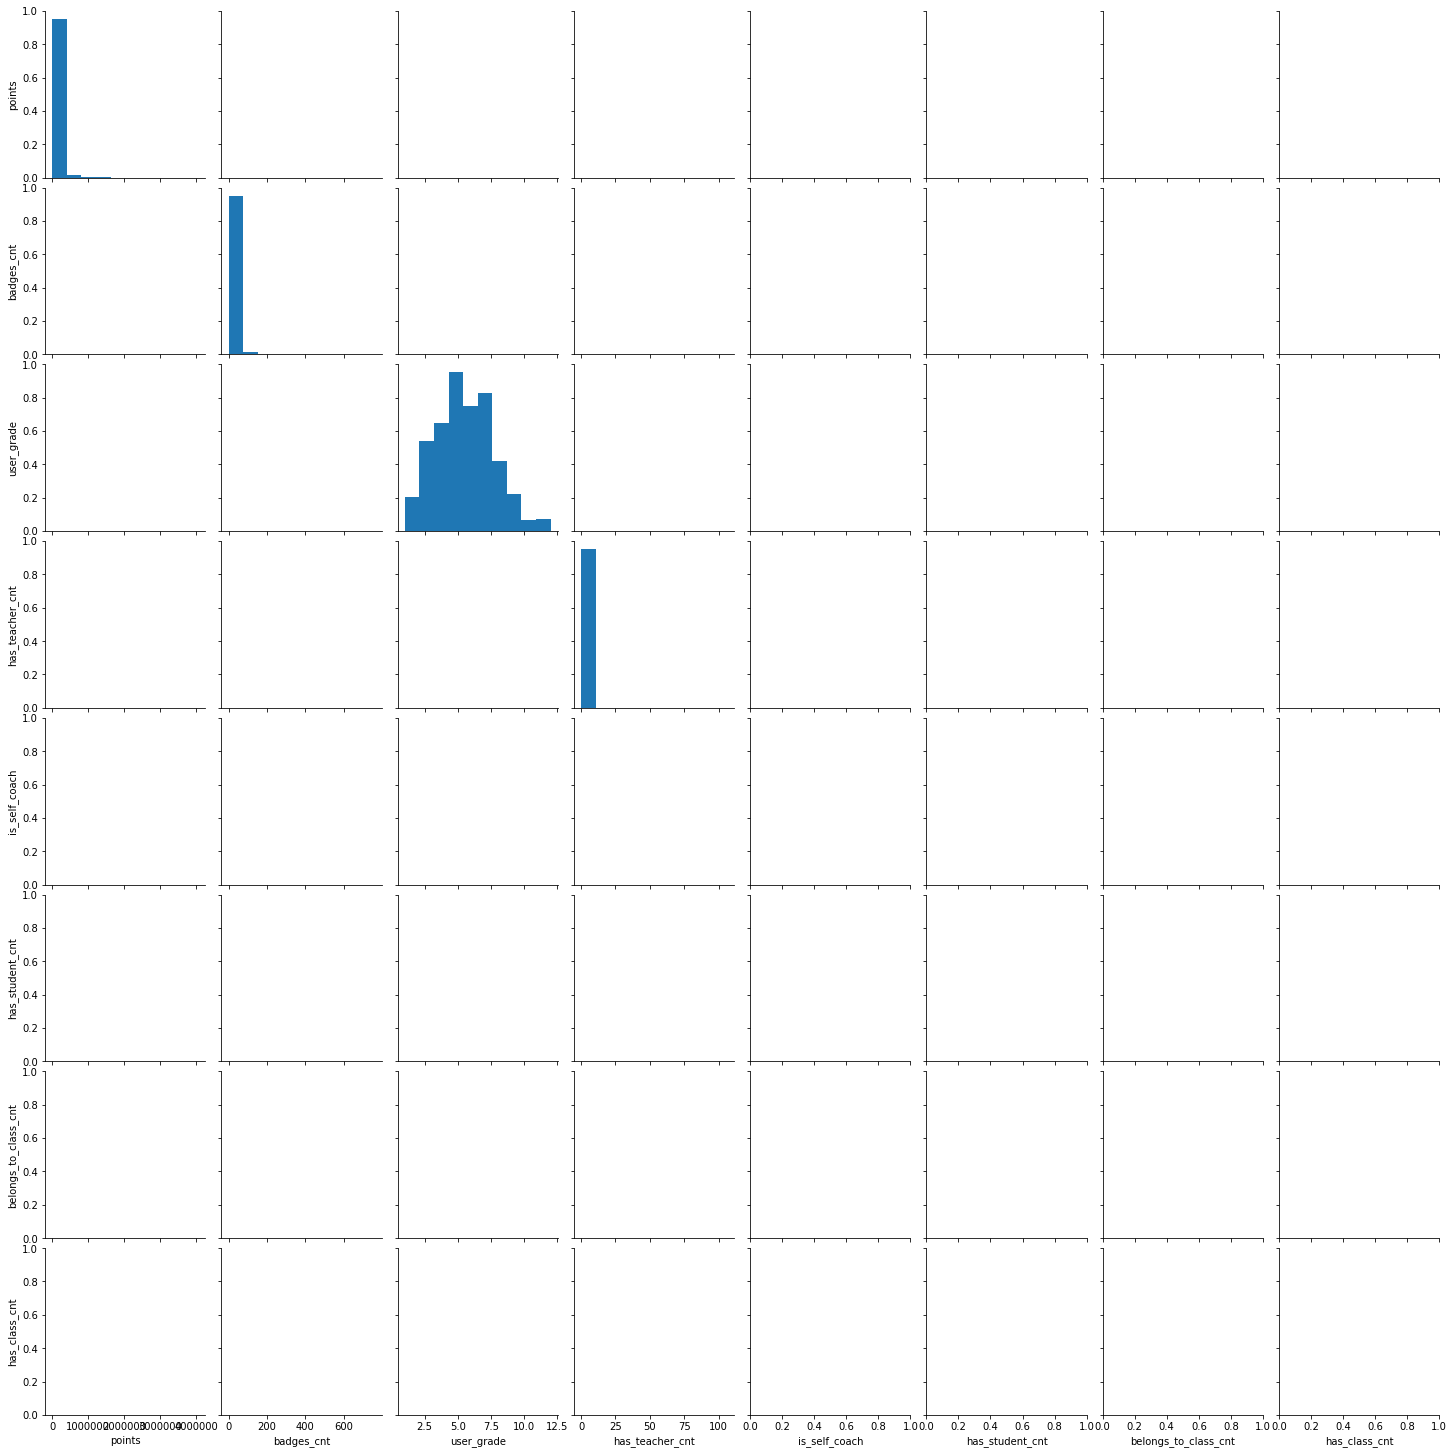

In [88]:
sns.pairplot(raw_df_InfoUser)

In [53]:
df_LogProblem.head()

,timestamp_TW,uuid,ucid,upid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level
6814,2018-09-28 20:00:00 UTC,Kpq2q+eKw/O+6/jLs3XJosgmI7weEJxJZdnkKTbbF8I=,Ps4dfShfpeMF3VG030HqZ2bsbD7PaVxvJYFTtroeSzQ=,ZmKEZ0F2WFqhlL7KFfJcHEnZCZu0e4p+CVG5rSlyKYk=,2,1,True,11,1,0,False,NaN,NaN,0
6815,2018-09-28 10:15:00 UTC,0+VU/Zb0Q96uoByuRhl7r9bJuJO6CKWpsmNMEuijSzc=,/d39FzqaM3PZzpoMXxA80PMICsVhzfL6MGSCqZtsQOo=,tO9dyvadKWMVQgEx/BXtRIYJ2TRJFQgwvcsBwFb4+xI=,6,1,True,26,1,0,False,NaN,NaN,0
6816,2018-09-05 20:00:00 UTC,g8DnYvIqpolw10XlwWeIWv6NbDPByUbmgH8EshJqBns=,YuGOmB+frbM8rfAa0RJE882R+IoMf9N89OiVqLbAHBw=,6Lxz6aXvgyw3vZd3v8g6jgoCRDPOQzVPx/dnEC0o7DQ=,4,1,True,78,1,0,False,NaN,NaN,0
6817,2018-09-14 16:30:00 UTC,kSyUTFlepsYUD723IPL/jEZ520xaKbscrBmNtBUFR1o=,BG1RsWojzEHzV28RBm/1iKi1NyZgDcDomLYEJSV6lmo=,1fIjdakTApQp5PfWog87uOmM6JuoNE/oQq2y5/fMmfw=,3,1,True,7,1,0,False,NaN,NaN,0
6818,2018-09-13 16:00:00 UTC,XMFbFA7C49+LRhUddhelfPpA6F5dbOoxeyL3eYbuTlY=,qPHR8aBqOhKij9IS/Y8IR8prwWruoDBGU1tVUhXDJkE=,8V/NT6M+er2I3V3ZIWRNo4Qbo3Iad89PHbeeZeoZeF0=,12,1,True,48,1,0,False,False,True,1


In [54]:
df_InfoContent.head()

,content_pretty_name,content_kind,difficulty,subject,learning_stage,level1_id,level2_id,level3_id,level4_id
ucid,,,,,,,,,
odIwFdIiecFwVUAEEV40K3MSuCSlIZkbq92Zp9tkZq8=,【基礎】怎樣解題：數量關係,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
dfeeBaa8zDhWS6nu7zeXKwLyi4zqEajI3tJM9/fSBPM=,【基礎】和差問題 1,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
C2AT0OBTUn+PRxEVd39enhW/DJtka1Tk90DUAR6yVdA=,【基礎】雞兔問題 1,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
jZvYpEa6VB/WrlKKmQHnfbv/xJ4OypBzq0epVcn500Q=,【基礎】年齡問題 1,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
M+UxJPgRIW57a0YS3eik8A9YDj+AwaMpTa5yWYn/kAw=,【基礎】追趕問題,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=


### 3.1 Handling Missing Values
The first thing to do when you get a new dataset is take a look at some of it. This lets you see that it all read in correctly and gives an idea of what's going on with the data. In this case, let's see if there are any missing values, which will be reprsented with NaN or None.

- Info User

In [55]:
df_InfoUser.head(5)

,gender,points,badges_cnt,first_login_date_TW,user_grade,user_city,has_teacher_cnt,is_self_coach,has_student_cnt,belongs_to_class_cnt,has_class_cnt
uuid,,,,,,,,,,,
Y2RcCdmUJAYPUAIDElo4nE9KrkLLFzUIRdexG+ipaZQ=,NaN,18300,1,2019-01-24,1,kh,0,False,0,0,0
lw/Rchfvl9q1UDaQRmeE6QJDJeXAK7nt56RvUvqxD/8=,NaN,6468,0,2019-01-24,1,ntpc,1,False,0,1,0
ncVYyCw3osV77X9M+4NbI7LvBR5UiB4ix6Ca+baQArA=,male,4703,0,2019-01-24,1,tp,0,False,0,0,0
J7Tbo1x2WtRpPuXeX7lWT9tkzWlSJeubl8UWjNmHh+4=,NaN,15525,1,2019-01-24,2,ntpc,0,False,0,0,0
qijKzROzz1LmCaCxHJ3mOBOtjW/q4kW80tnpPmXHVYQ=,NaN,7945,0,2019-01-24,2,km,1,False,0,1,0


Ok, now we know that we do have some missing values. Let's see how many we have in each column.

In [56]:
# get the number of missing data points per column
missing_values_count = df_InfoUser.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count

gender                  39853
points                      0
badges_cnt                  0
first_login_date_TW         0
user_grade                  0
user_city                   0
has_teacher_cnt             0
is_self_coach               0
has_student_cnt             0
belongs_to_class_cnt        0
has_class_cnt               0
dtype: int64

That seems like a lot! It might be helpful to see what percentage of the values in our dataset were missing to give us a better sense of the scale of this problem:

In [57]:
# how many total missing values do we have?
total_cells = np.product(df_InfoUser.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

4.979521152313147


In [58]:
# replace all NA's with unspecified
df_InfoUser.fillna('unspecified')

,gender,points,badges_cnt,first_login_date_TW,user_grade,user_city,has_teacher_cnt,is_self_coach,has_student_cnt,belongs_to_class_cnt,has_class_cnt
uuid,,,,,,,,,,,
Y2RcCdmUJAYPUAIDElo4nE9KrkLLFzUIRdexG+ipaZQ=,unspecified,18300,1,2019-01-24,1,kh,0,False,0,0,0
lw/Rchfvl9q1UDaQRmeE6QJDJeXAK7nt56RvUvqxD/8=,unspecified,6468,0,2019-01-24,1,ntpc,1,False,0,1,0
ncVYyCw3osV77X9M+4NbI7LvBR5UiB4ix6Ca+baQArA=,male,4703,0,2019-01-24,1,tp,0,False,0,0,0
J7Tbo1x2WtRpPuXeX7lWT9tkzWlSJeubl8UWjNmHh+4=,unspecified,15525,1,2019-01-24,2,ntpc,0,False,0,0,0
qijKzROzz1LmCaCxHJ3mOBOtjW/q4kW80tnpPmXHVYQ=,unspecified,7945,0,2019-01-24,2,km,1,False,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
ESAeVlIpxgtgb2EtZb8K+plFLqKch5ffAgRzKnQqTQ4=,unspecified,2393,2,2019-01-23,10,tc,1,False,0,1,0
DBQkIr4grFmnG2Aml3+haxfHbxp0kgerOxJfJ9JEWpE=,unspecified,1283,0,2019-01-23,10,chc,0,False,0,0,0
2KR+J0mQ2231WhAzulTMJ7ZuyKj43bPYbSdefVwOeQc=,unspecified,5059,2,2019-01-23,10,tp,0,False,0,0,0


- Log Problem

In [59]:
df_LogProblem.head(5)

,timestamp_TW,uuid,ucid,upid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level
6814,2018-09-28 20:00:00 UTC,Kpq2q+eKw/O+6/jLs3XJosgmI7weEJxJZdnkKTbbF8I=,Ps4dfShfpeMF3VG030HqZ2bsbD7PaVxvJYFTtroeSzQ=,ZmKEZ0F2WFqhlL7KFfJcHEnZCZu0e4p+CVG5rSlyKYk=,2,1,True,11,1,0,False,NaN,NaN,0
6815,2018-09-28 10:15:00 UTC,0+VU/Zb0Q96uoByuRhl7r9bJuJO6CKWpsmNMEuijSzc=,/d39FzqaM3PZzpoMXxA80PMICsVhzfL6MGSCqZtsQOo=,tO9dyvadKWMVQgEx/BXtRIYJ2TRJFQgwvcsBwFb4+xI=,6,1,True,26,1,0,False,NaN,NaN,0
6816,2018-09-05 20:00:00 UTC,g8DnYvIqpolw10XlwWeIWv6NbDPByUbmgH8EshJqBns=,YuGOmB+frbM8rfAa0RJE882R+IoMf9N89OiVqLbAHBw=,6Lxz6aXvgyw3vZd3v8g6jgoCRDPOQzVPx/dnEC0o7DQ=,4,1,True,78,1,0,False,NaN,NaN,0
6817,2018-09-14 16:30:00 UTC,kSyUTFlepsYUD723IPL/jEZ520xaKbscrBmNtBUFR1o=,BG1RsWojzEHzV28RBm/1iKi1NyZgDcDomLYEJSV6lmo=,1fIjdakTApQp5PfWog87uOmM6JuoNE/oQq2y5/fMmfw=,3,1,True,7,1,0,False,NaN,NaN,0
6818,2018-09-13 16:00:00 UTC,XMFbFA7C49+LRhUddhelfPpA6F5dbOoxeyL3eYbuTlY=,qPHR8aBqOhKij9IS/Y8IR8prwWruoDBGU1tVUhXDJkE=,8V/NT6M+er2I3V3ZIWRNo4Qbo3Iad89PHbeeZeoZeF0=,12,1,True,48,1,0,False,False,True,1


In [60]:
# get the number of missing data points per column
missing_values_count = df_LogProblem.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count

timestamp_TW                             0
uuid                                     0
ucid                                     0
upid                                     0
problem_number                           0
exercise_problem_repeat_session          0
is_correct                               0
total_sec_taken                          0
total_attempt_cnt                        0
used_hint_cnt                            0
is_hint_used                             0
is_downgrade                       6365746
is_upgrade                         6365746
level                                    0
dtype: int64

In [61]:
# how many total missing values do we have?
total_cells = np.product(df_LogProblem.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

12.634995256130166


In [62]:
# replace all NA's with false
df_InfoUser.fillna('false')

,gender,points,badges_cnt,first_login_date_TW,user_grade,user_city,has_teacher_cnt,is_self_coach,has_student_cnt,belongs_to_class_cnt,has_class_cnt
uuid,,,,,,,,,,,
Y2RcCdmUJAYPUAIDElo4nE9KrkLLFzUIRdexG+ipaZQ=,false,18300,1,2019-01-24,1,kh,0,False,0,0,0
lw/Rchfvl9q1UDaQRmeE6QJDJeXAK7nt56RvUvqxD/8=,false,6468,0,2019-01-24,1,ntpc,1,False,0,1,0
ncVYyCw3osV77X9M+4NbI7LvBR5UiB4ix6Ca+baQArA=,male,4703,0,2019-01-24,1,tp,0,False,0,0,0
J7Tbo1x2WtRpPuXeX7lWT9tkzWlSJeubl8UWjNmHh+4=,false,15525,1,2019-01-24,2,ntpc,0,False,0,0,0
qijKzROzz1LmCaCxHJ3mOBOtjW/q4kW80tnpPmXHVYQ=,false,7945,0,2019-01-24,2,km,1,False,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
ESAeVlIpxgtgb2EtZb8K+plFLqKch5ffAgRzKnQqTQ4=,false,2393,2,2019-01-23,10,tc,1,False,0,1,0
DBQkIr4grFmnG2Aml3+haxfHbxp0kgerOxJfJ9JEWpE=,false,1283,0,2019-01-23,10,chc,0,False,0,0,0
2KR+J0mQ2231WhAzulTMJ7ZuyKj43bPYbSdefVwOeQc=,false,5059,2,2019-01-23,10,tp,0,False,0,0,0


In [63]:
df_InfoContent.head(5)

,content_pretty_name,content_kind,difficulty,subject,learning_stage,level1_id,level2_id,level3_id,level4_id
ucid,,,,,,,,,
odIwFdIiecFwVUAEEV40K3MSuCSlIZkbq92Zp9tkZq8=,【基礎】怎樣解題：數量關係,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
dfeeBaa8zDhWS6nu7zeXKwLyi4zqEajI3tJM9/fSBPM=,【基礎】和差問題 1,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
C2AT0OBTUn+PRxEVd39enhW/DJtka1Tk90DUAR6yVdA=,【基礎】雞兔問題 1,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
jZvYpEa6VB/WrlKKmQHnfbv/xJ4OypBzq0epVcn500Q=,【基礎】年齡問題 1,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
M+UxJPgRIW57a0YS3eik8A9YDj+AwaMpTa5yWYn/kAw=,【基礎】追趕問題,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=


In [64]:
# get the number of missing data points per column
missing_values_count = df_InfoContent.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count

content_pretty_name    0
content_kind           0
difficulty             0
subject                0
learning_stage         0
level1_id              0
level2_id              0
level3_id              0
level4_id              0
dtype: int64

In [65]:
# how many total missing values do we have?
total_cells = np.product(df_InfoContent.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.0


There is no missing values for the Info Content dataset, nothing has been changed.

## Outlier Removal

In [ ]:
features_InfoUser = ['points','badges_cnt','user_grade']

fig, (ax1, ax2, ax3) = plt.subplots(3,1)
ax1.plot(df_InfoUser['points'])
ax2.plot(df_InfoUser['badges_cnt'])
ax3.plot(df_InfoUser['user_grade'])

In [103]:
df_InfoUser['user_grade'].describe()

count    72758.000000
mean         5.620715
std          2.041178
min          1.000000
25%          4.000000
50%          6.000000
75%          7.000000
max         12.000000
Name: user_grade, dtype: float64

### Handling Text

In [66]:
df_InfoContent['content_pretty_name'].tail(5)

ucid
NPkrCjbLK35wefMCv6y6XMO5eYO/gthS6LGwrdjG2OQ=     【進階】平方公分綜合習題
3xqxJN2W+KEo3SBjh7HnXpGjB4ewSbm1j/18fCn05yc=    【進階】周長與面積綜合習題
j4rGpwpqhLE9foelXD2yjokS0u3QR+ULhNqLGeF/4sk=     【一般】平方公分綜合習題
W4l0TIo0YQXLT/c8/Uy7OLtElmNuNWPODI7HkJ0NaI0=    【一般】周長與面積綜合習題
gvez7GFXUbuQl27U5+p/4QwFZZyXP2QFYQdoor8ZkeE=     【一般】周長與面積的應用
Name: content_pretty_name, dtype: object

- Cleaning Text

In [67]:
df_InfoContent['content_pretty_name'] = df_InfoContent['content_pretty_name'].replace(to_replace=r'\【.*\】', value='', regex=True)

In [68]:
df_InfoContent['content_pretty_name']

ucid
odIwFdIiecFwVUAEEV40K3MSuCSlIZkbq92Zp9tkZq8=    怎樣解題：數量關係
dfeeBaa8zDhWS6nu7zeXKwLyi4zqEajI3tJM9/fSBPM=       和差問題 1
C2AT0OBTUn+PRxEVd39enhW/DJtka1Tk90DUAR6yVdA=       雞兔問題 1
jZvYpEa6VB/WrlKKmQHnfbv/xJ4OypBzq0epVcn500Q=       年齡問題 1
M+UxJPgRIW57a0YS3eik8A9YDj+AwaMpTa5yWYn/kAw=         追趕問題
                                                  ...    
NPkrCjbLK35wefMCv6y6XMO5eYO/gthS6LGwrdjG2OQ=     平方公分綜合習題
3xqxJN2W+KEo3SBjh7HnXpGjB4ewSbm1j/18fCn05yc=    周長與面積綜合習題
j4rGpwpqhLE9foelXD2yjokS0u3QR+ULhNqLGeF/4sk=     平方公分綜合習題
W4l0TIo0YQXLT/c8/Uy7OLtElmNuNWPODI7HkJ0NaI0=    周長與面積綜合習題
gvez7GFXUbuQl27U5+p/4QwFZZyXP2QFYQdoor8ZkeE=     周長與面積的應用
Name: content_pretty_name, Length: 1330, dtype: object

- Translating Text

In [69]:
df_InfoContent['content_pretty_name'] = df_InfoContent['content_pretty_name'].apply(translator.translate, src='zh-tw', dest='en').apply(getattr, args=('text',))

In [78]:
#pd.get_option("display.max_rows")
#pd.set_option("display.max_rows", 1000)
df_InfoContent.tail(25)

,content_pretty_name,content_kind,difficulty,subject,learning_stage,level1_id,level2_id,level3_id,level4_id
ucid,,,,,,,,,
cvrpe2HqRWypDZTWd3ry5QCy4XdRg67y3MIeZlRYaes=,Comprehensive exercises for kilograms and grams,Exercise,normal,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,3fgcSGTzD9uuOjoB5R7onIyqBhvluj0aVuSIpMfqLdQ=,jLZ490t6hQgfXklhPDMsb0Mt2O/1Oh4bjzk/WCIuEDI=
jpb1rgDXjbe7vvSvZzIoPtn6mVIKPxauQ1QVTvzkAdw=,生活中的大單位綜合習題,Exercise,normal,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,3fgcSGTzD9uuOjoB5R7onIyqBhvluj0aVuSIpMfqLdQ=,PmvKyOgXaZD0sdpQTlIkVXfBzlUEcSoPM+PcqrAhY8A=
TOdFpZ3Xqdh28DnIte6gehxDLIIUkzWMwfqed8sEJwE=,Daily applications of metric tons and kilograms,Exercise,normal,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,3fgcSGTzD9uuOjoB5R7onIyqBhvluj0aVuSIpMfqLdQ=,PmvKyOgXaZD0sdpQTlIkVXfBzlUEcSoPM+PcqrAhY8A=
Mujc7fhlpiAZ/8+VvJTuahAOrjvNECvtA4YBD6fP02Y=,平方公里與公頃、公畝、平方公尺的換算,Exercise,normal,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,3fgcSGTzD9uuOjoB5R7onIyqBhvluj0aVuSIpMfqLdQ=,PmvKyOgXaZD0sdpQTlIkVXfBzlUEcSoPM+PcqrAhY8A=
7lZW5SB9whu/nq0QJ1pCSdPhmnwhRqHIldZ1Fu9tZfc=,公升與毫升的單位換算及大小比較,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,31v13N8GN4hIUpg1IsMv4DVkK8Hlb0XhHnHnBR1Ivcs=,H/Gur2S2Uu/kLtAooYdWZcHmWcAjolqpBFzWO2Ksjzw=
Km4UtamxG5HOGBYO5bAFwlruZSFNKxlILK2wKiFEcSI=,Liter and milliliter comprehensive exercises,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,31v13N8GN4hIUpg1IsMv4DVkK8Hlb0XhHnHnBR1Ivcs=,H/Gur2S2Uu/kLtAooYdWZcHmWcAjolqpBFzWO2Ksjzw=
fwR0w0LLlf3OriHwW2vIK3RiKD8gRLRfHC1T6kQhG0g=,Know ml,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,31v13N8GN4hIUpg1IsMv4DVkK8Hlb0XhHnHnBR1Ivcs=,H/Gur2S2Uu/kLtAooYdWZcHmWcAjolqpBFzWO2Ksjzw=
tcefpcahExZLA6gms/r4H1DHPHzmBUwg8h7hfNlV4sc=,Know the liter,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,31v13N8GN4hIUpg1IsMv4DVkK8Hlb0XhHnHnBR1Ivcs=,H/Gur2S2Uu/kLtAooYdWZcHmWcAjolqpBFzWO2Ksjzw=
FJV9jFDQLQAIAZoc7YboSSkQOkS3dNtCQAVDL874AKM=,Capacity application problem,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,31v13N8GN4hIUpg1IsMv4DVkK8Hlb0XhHnHnBR1Ivcs=,H/Gur2S2Uu/kLtAooYdWZcHmWcAjolqpBFzWO2Ksjzw=


### Parsing Date

In [71]:
df_InfoUser['date_login'] = pd.to_datetime(df_InfoUser['first_login_date_TW'], format='%Y-%m-%d')
df_InfoUser['year_login'] = df_InfoUser['date_login'].apply(lambda x: x.year)
df_InfoUser['month_login'] = df_InfoUser['date_login'].apply(lambda x: x.month)
df_InfoUser['day_login'] = df_InfoUser['date_login'].apply(lambda x: x.day)

In [72]:
df_LogProblem['datetime_attempt'] = pd.to_datetime(df_LogProblem['timestamp_TW'], format='%Y-%m-%d %H:%M:%S %Z')
df_LogProblem['year_attempt'] = df_LogProblem['datetime_attempt'].apply(lambda x: x.year)
df_LogProblem['month_attempt'] = df_LogProblem['datetime_attempt'].apply(lambda x: x.month)
df_LogProblem['day_attempt'] = df_LogProblem['datetime_attempt'].apply(lambda x: x.day)

In [73]:
df_LogProblem.head()

,timestamp_TW,uuid,ucid,upid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level,datetime_attempt,year_attempt,month_attempt,day_attempt
6814,2018-09-28 20:00:00 UTC,Kpq2q+eKw/O+6/jLs3XJosgmI7weEJxJZdnkKTbbF8I=,Ps4dfShfpeMF3VG030HqZ2bsbD7PaVxvJYFTtroeSzQ=,ZmKEZ0F2WFqhlL7KFfJcHEnZCZu0e4p+CVG5rSlyKYk=,2,1,True,11,1,0,False,NaN,NaN,0,2018-09-28 20:00:00+00:00,2018,9,28
6815,2018-09-28 10:15:00 UTC,0+VU/Zb0Q96uoByuRhl7r9bJuJO6CKWpsmNMEuijSzc=,/d39FzqaM3PZzpoMXxA80PMICsVhzfL6MGSCqZtsQOo=,tO9dyvadKWMVQgEx/BXtRIYJ2TRJFQgwvcsBwFb4+xI=,6,1,True,26,1,0,False,NaN,NaN,0,2018-09-28 10:15:00+00:00,2018,9,28
6816,2018-09-05 20:00:00 UTC,g8DnYvIqpolw10XlwWeIWv6NbDPByUbmgH8EshJqBns=,YuGOmB+frbM8rfAa0RJE882R+IoMf9N89OiVqLbAHBw=,6Lxz6aXvgyw3vZd3v8g6jgoCRDPOQzVPx/dnEC0o7DQ=,4,1,True,78,1,0,False,NaN,NaN,0,2018-09-05 20:00:00+00:00,2018,9,5
6817,2018-09-14 16:30:00 UTC,kSyUTFlepsYUD723IPL/jEZ520xaKbscrBmNtBUFR1o=,BG1RsWojzEHzV28RBm/1iKi1NyZgDcDomLYEJSV6lmo=,1fIjdakTApQp5PfWog87uOmM6JuoNE/oQq2y5/fMmfw=,3,1,True,7,1,0,False,NaN,NaN,0,2018-09-14 16:30:00+00:00,2018,9,14
6818,2018-09-13 16:00:00 UTC,XMFbFA7C49+LRhUddhelfPpA6F5dbOoxeyL3eYbuTlY=,qPHR8aBqOhKij9IS/Y8IR8prwWruoDBGU1tVUhXDJkE=,8V/NT6M+er2I3V3ZIWRNo4Qbo3Iad89PHbeeZeoZeF0=,12,1,True,48,1,0,False,False,True,1,2018-09-13 16:00:00+00:00,2018,9,13


### Merge Dataset

In [75]:
merge_df_LogProblem_InfoUser = pd.merge(df_LogProblem, df_InfoUser, on = 'uuid')
merge_df_LogProblem_InfoUser.head()

,timestamp_TW,uuid,ucid,upid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,...,user_city,has_teacher_cnt,is_self_coach,has_student_cnt,belongs_to_class_cnt,has_class_cnt,date_login,year_login,month_login,day_login
0,2018-09-28 20:00:00 UTC,Kpq2q+eKw/O+6/jLs3XJosgmI7weEJxJZdnkKTbbF8I=,Ps4dfShfpeMF3VG030HqZ2bsbD7PaVxvJYFTtroeSzQ=,ZmKEZ0F2WFqhlL7KFfJcHEnZCZu0e4p+CVG5rSlyKYk=,2,1,True,11,1,0,...,ml,10,True,1,10,1,2018-09-05,2018,9,5
1,2018-09-28 20:15:00 UTC,Kpq2q+eKw/O+6/jLs3XJosgmI7weEJxJZdnkKTbbF8I=,Ps4dfShfpeMF3VG030HqZ2bsbD7PaVxvJYFTtroeSzQ=,Ilkv6d+nFM00DAFC0cnj++DQvBFu6eMcD7UCIGCNrws=,19,2,True,19,1,0,...,ml,10,True,1,10,1,2018-09-05,2018,9,5
2,2018-10-24 10:15:00 UTC,Kpq2q+eKw/O+6/jLs3XJosgmI7weEJxJZdnkKTbbF8I=,RKkxBe+3Z33I75tZfZ8EY7LtVnN5QEfE8O0y6bPFCeo=,STZD5cyjUf3J2AETFRoMb+LREPAPoAY3Cc8b63jV3Qw=,19,2,False,18,3,4,...,ml,10,True,1,10,1,2018-09-05,2018,9,5
3,2018-10-31 19:15:00 UTC,Kpq2q+eKw/O+6/jLs3XJosgmI7weEJxJZdnkKTbbF8I=,MUbqU/Il0Jtq/WAby1VtcO+pS/tc7QnNE3TI/GuzuMM=,JrljyCVNZ6U5o5pyaJ/SZGoSW9QoWVGk2kOHeNFJk8A=,5,1,False,112,4,3,...,ml,10,True,1,10,1,2018-09-05,2018,9,5
4,2018-10-19 14:15:00 UTC,Kpq2q+eKw/O+6/jLs3XJosgmI7weEJxJZdnkKTbbF8I=,Qx6mwirYKln7CTvOXad5Do5OkVKmypYSQfFs0MB6Cvs=,3etEMUOdg1aQ094NPnamWU0T0NbViDtKHt8ytLDsp2k=,3,1,False,123,11,3,...,ml,10,True,1,10,1,2018-09-05,2018,9,5


In [76]:
merge_df_LogProblem_InfoUser_InfoContent = pd.merge(merge_df_LogProblem_InfoUser, df_InfoContent, on = 'ucid')

In [80]:
merge_df_LogProblem_InfoUser_InfoContent.head()

,timestamp_TW,uuid,ucid,upid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,...,day_login,content_pretty_name,content_kind,difficulty,subject,learning_stage,level1_id,level2_id,level3_id,level4_id
0,2018-09-28 20:00:00 UTC,Kpq2q+eKw/O+6/jLs3XJosgmI7weEJxJZdnkKTbbF8I=,Ps4dfShfpeMF3VG030HqZ2bsbD7PaVxvJYFTtroeSzQ=,ZmKEZ0F2WFqhlL7KFfJcHEnZCZu0e4p+CVG5rSlyKYk=,2,1,True,11,1,0,...,5,Application of multiples,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,ItasYR+er/FlZlRvL66/NB3wY0AvmlrZKoqe4gmPyD0=,VHYt8IeoqiIPVsB+32JAhIjK9jU+pnr11fL80QshARI=
1,2018-09-28 20:15:00 UTC,Kpq2q+eKw/O+6/jLs3XJosgmI7weEJxJZdnkKTbbF8I=,Ps4dfShfpeMF3VG030HqZ2bsbD7PaVxvJYFTtroeSzQ=,Ilkv6d+nFM00DAFC0cnj++DQvBFu6eMcD7UCIGCNrws=,19,2,True,19,1,0,...,5,Application of multiples,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,ItasYR+er/FlZlRvL66/NB3wY0AvmlrZKoqe4gmPyD0=,VHYt8IeoqiIPVsB+32JAhIjK9jU+pnr11fL80QshARI=
2,2018-09-30 17:00:00 UTC,Kpq2q+eKw/O+6/jLs3XJosgmI7weEJxJZdnkKTbbF8I=,Ps4dfShfpeMF3VG030HqZ2bsbD7PaVxvJYFTtroeSzQ=,owavtXN1kkSf8ts9s7/RdlZ0URghFjbbDdYSbeTdGDI=,39,3,False,81,2,3,...,5,Application of multiples,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,ItasYR+er/FlZlRvL66/NB3wY0AvmlrZKoqe4gmPyD0=,VHYt8IeoqiIPVsB+32JAhIjK9jU+pnr11fL80QshARI=
3,2018-09-28 20:15:00 UTC,Kpq2q+eKw/O+6/jLs3XJosgmI7weEJxJZdnkKTbbF8I=,Ps4dfShfpeMF3VG030HqZ2bsbD7PaVxvJYFTtroeSzQ=,fXsDzZlk7znVxvd/mZ9sEVdhUtqnLMJTj+PyOzaeLLk=,17,2,False,16,3,3,...,5,Application of multiples,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,ItasYR+er/FlZlRvL66/NB3wY0AvmlrZKoqe4gmPyD0=,VHYt8IeoqiIPVsB+32JAhIjK9jU+pnr11fL80QshARI=
4,2018-09-30 16:45:00 UTC,Kpq2q+eKw/O+6/jLs3XJosgmI7weEJxJZdnkKTbbF8I=,Ps4dfShfpeMF3VG030HqZ2bsbD7PaVxvJYFTtroeSzQ=,Ilkv6d+nFM00DAFC0cnj++DQvBFu6eMcD7UCIGCNrws=,31,3,True,11,1,0,...,5,Application of multiples,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,ItasYR+er/FlZlRvL66/NB3wY0AvmlrZKoqe4gmPyD0=,VHYt8IeoqiIPVsB+32JAhIjK9jU+pnr11fL80QshARI=


In [81]:
merge_df_LogProblem_InfoUser_InfoContent.describe()

,problem_number,exercise_problem_repeat_session,total_sec_taken,total_attempt_cnt,used_hint_cnt,level,year_attempt,month_attempt,day_attempt,points,badges_cnt,user_grade,has_teacher_cnt,has_student_cnt,belongs_to_class_cnt,has_class_cnt,year_login,month_login,day_login
count,7.197409e+06,7.197409e+06,7.197409e+06,7.197409e+06,7.197409e+06,7.197409e+06,7197409.0,7.197409e+06,7.197409e+06,7.197409e+06,7.197409e+06,7.197409e+06,7.197409e+06,7.197409e+06,7.197409e+06,7.197409e+06,7.197409e+06,7.197409e+06,7.197409e+06
mean,1.001285e+01,1.239664e+00,4.289799e+01,1.761079e+00,5.401233e-01,5.071015e-01,2018.0,1.081215e+01,1.608885e+01,3.240217e+05,3.952833e+01,5.570669e+00,1.450594e+00,6.665496e-01,1.568116e+00,1.040288e-01,2.018001e+03,9.450487e+00,1.505955e+01
std,1.614323e+01,9.271148e-01,9.674170e+01,3.031576e+00,1.136486e+00,9.502333e-01,0.0,1.207111e+00,8.515784e+00,3.544343e+05,4.636252e+01,1.782916e+00,2.346693e+00,1.730841e+01,3.112610e+00,5.456074e-01,2.816745e-02,1.098439e+00,9.192488e+00
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2018.0,8.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.018000e+03,1.000000e+00,1.000000e+00
25%,3.000000e+00,1.000000e+00,1.000000e+01,1.000000e+00,0.000000e+00,0.000000e+00,2018.0,1.000000e+01,9.000000e+00,8.258700e+04,1.100000e+01,5.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.018000e+03,9.000000e+00,7.000000e+00
50%,6.000000e+00,1.000000e+00,2.100000e+01,1.000000e+00,0.000000e+00,0.000000e+00,2018.0,1.100000e+01,1.600000e+01,1.998670e+05,2.600000e+01,5.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2.018000e+03,9.000000e+00,1.400000e+01
75%,1.100000e+01,1.000000e+00,4.400000e+01,1.000000e+00,0.000000e+00,1.000000e+00,2018.0,1.200000e+01,2.400000e+01,4.183370e+05,5.200000e+01,7.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.018000e+03,1.000000e+01,2.200000e+01
max,8.710000e+02,6.100000e+01,1.800000e+03,8.170000e+02,1.300000e+01,4.000000e+00,2018.0,1.200000e+01,3.100000e+01,2.476118e+06,7.600000e+02,1.200000e+01,1.060000e+02,9.660000e+02,1.200000e+02,2.400000e+01,2.019000e+03,1.200000e+01,3.100000e+01


In [ ]:
# Standardizing
from sklearn.preprocessing import StandardScaler

features

In [226]:
merge_df_LogProblem_InfoUser_InfoContent.groupby(['content_pretty_name','uuid']) \
        .agg({'uuid':'count', 'total_sec_taken':'mean','total_attempt_cnt':'mean'}) \
        .rename(columns={'uuid':'count','total_sec_taken':'total sec taken'}) \
        .reset_index()

,content_pretty_name,uuid,count,total sec taken,total_attempt_cnt
0,時間的基本概念,+1EtHQKEVT+ebZYjmLpyd9rQR13/bwmHZENZ8p6qxvI=,3,12.000000,1.000000
1,時間的基本概念,+1MK7AXO4FAPqL5O37KhLqa1f7VAlhUhMaViuLs/QE0=,2,25.000000,3.000000
2,時間的基本概念,+4WlShSd4sqkedrbj6w1KoUcK1kd/uudseuccMD1rVc=,12,10.916667,1.416667
3,時間的基本概念,+4XtOUFmbVptlLlMaZLqAwt3LF2VBoU7pgIcCpKuUKM=,14,9.214286,1.428571
4,時間的基本概念,+CpT30GOm/YPy5sQAYy8DwXbJ84W3DHy+x6I333nncI=,10,11.200000,1.100000
...,...,...,...,...,...
717756,體積：立方公分綜合習題,z+wkKkqsaED6QOJZLc8dIgP4S3nuPp1JykxGhCaGE7E=,11,13.454545,1.000000
717757,體積：立方公分綜合習題,z4UwNA5DG4o3rwth2Hm4Ekz4MCndmlGz/k1+s09WFSQ=,4,36.500000,3.500000
717758,體積：立方公分綜合習題,zA9qxBneOkZzdikrzs8BrB7zq2DCfBzLZqV6sOqlZ2o=,38,18.631579,1.447368
717759,體積：立方公分綜合習題,zlbXZ3rS8iX0J+O1igq/rMmP0yxAw52Pg/7+6zoRad0=,36,14.444444,1.166667


In [56]:
raw_df_LogProblem.shape

(16217311, 14)

In [57]:
pd.pivot_table(merge_df_LogProblem_InfoUser_InfoContent,
                        values = ['total_sec_taken'],
                        index = ['content_pretty_name','uuid'],
                        columns = [],aggfunc=[np.mean], 
                        margins=True)

mean
                                                                                   total_sec_taken
content_pretty_name                   uuid                                                        
A brief note on algebraic expressions +2ThnpLSMJmhHRtF+eeCXVSnqgkRfjzyz8fip0NcpGA=       15.000000
                                      +2abMV9txxcfEweYKMsmCCuGOAULfHyrW1x30xcaJNc=       15.000000
                                      +3PS3StJNpyUoL1nu0+OqGfGtJ9f6K1ZSPM0HPLd+R0=       17.600000
                                      +63OvIhAIlYhZ3fOUlKIfSKRJc9ktfQly9JRrk/Sznw=       11.400000
                                      +FcHdDAsqZphfzlf5Crh+O79NQJHqKoK65BwBj12aiQ=       18.000000
...                                                                                            ...
點與線、線與線距離                             zjBkUBYx8nQw8y2HW4JIOIbGFNCix59AWmVN4mghR+Q=       12.000000
                                      zkyr61bZqL5GzwOTCmriswdGIWGoEtB4kKjsO30iJ9U=       10.021739
                                      zpdQm4TAvVRzoBDPeoRFh2pwzPzWIKPvMBPLUcTgd9w=       17.000000
                                      zv6KHHgAdCT+6qjbcKkQLhT4gjMq9u/PwTBpVGBoPi4=        0.000000
All                                                                                      42.897987

[768273 rows x 1 columns]

In [58]:
y = pd.pivot_table(merge_df_LogProblem_InfoUser_InfoContent[merge_df_LogProblem_InfoUser_InfoContent['uuid']=='+1EtHQKEVT+ebZYjmLpyd9rQR13/bwmHZENZ8p6qxvI='],
                        values = ['total_sec_taken'],
                        index = ['content_pretty_name'],
                        columns = ['is_correct'],aggfunc=[np.mean], 
                        margins=True)

In [125]:
content_pretty_name_total_sec_taken = pd.pivot_table(merge_df_LogProblem_InfoUser_InfoContent,
                        values = ['total_sec_taken'],
                        index = ['content_pretty_name'],
                        columns = [],aggfunc=[np.mean], 
                        margins=True)

In [145]:
x = pd.pivot_table(merge_df_LogProblem_InfoUser_InfoContent,
                        values = ['total_sec_taken'],
                        index = ['uuid','content_pretty_name'],
                        columns = [],aggfunc=[np.mean], 
                        margins=True)

In [ ]:
x.plot(kind='bar')

In [65]:
df_InfoUser.columns

Index(['gender', 'points', 'badges_cnt', 'first_login_date_TW', 'user_grade',
       'user_city', 'has_teacher_cnt', 'is_self_coach', 'has_student_cnt',
       'belongs_to_class_cnt', 'has_class_cnt'],
      dtype='object')

In [73]:
df_InfoUser.pivot_table('points', index='datetime', columns='gender', aggfunc='sum')

gender,female,male,unspecified
datetime,,,
2018-08-01,2161065.0,2549149.0,574757.0
2018-08-02,1119990.0,2541848.0,730106.0
2018-08-03,2206167.0,2431055.0,1514245.0
2018-08-04,999735.0,1880218.0,146625.0
2018-08-05,792624.0,743131.0,331981.0
...,...,...,...
2019-07-27,191918.0,213999.0,137804.0
2019-07-28,136311.0,210128.0,164306.0
2019-07-29,935737.0,1669339.0,691670.0


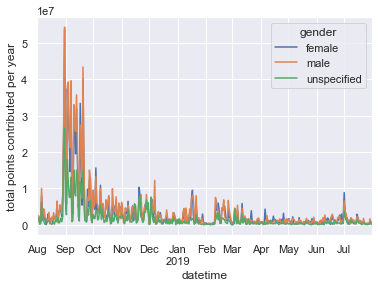

In [75]:
sns.set()  # use Seaborn styles
df_InfoUser.pivot_table('points', index='datetime', columns='gender', aggfunc='sum').plot()
plt.ylabel('total points contributed per year');

With a simple pivot table and plot() method, we can immediately see the annual trend in births by gender. By eye, it appears that over the past 50 years male births have outnumbered female births by around 5%.

In [133]:
content_pretty_name_total_sec_taken.columns

MultiIndex([('mean', 'total_sec_taken')],
           )

In [34]:
plt.figure(figsize=(16,9))
content_pretty_name_total_sec_taken.plot(kind='barh',figsize=(192,108))

NameError: name 'content_pretty_name_total_sec_taken' is not defined

<Figure size 1152x648 with 0 Axes>

### 3.2 Scaling and Normalization

In [ ]:
sns.distplot(df_InfoUser.points)

In [ ]:
sns.distplot(df_InfoUser.badges_cnt)

In [ ]:
sns.distplot(df_InfoUser.is_teacher_cnt)

## 4. Baseline Modeling

## 5. Secondary Modeling

## 6. Communicating Results

In my mind there are two directions your data science project can go: the data science product and the data science report.

First, you can create a data science product. Getting your model into production is, once again, a topic in itself. To begin with, you will need to move code from your Jupyter Notebook to scripts. In most firms, the data scientist will be working along side the software engineering team to write this code. The model will first need to be pickled and this can be accomplished with Scikit-Learn’s Joblib. Then we can use Flask and Heroku to create an application for your model. In this tutorial, I have elected to forgo this method. Developing data science products is a very useful skill and I myself am diving deeper into these processes. I encourage you to do the same!

Alternatively to the data product, you can create a data science report. You can showcase your results to the firm with a presentation and offer a technical overview on the process. Remember to keep your audience in mind. If you are presenting results to a room full of data scientists, go into detail. If you are advising the sales team, don’t talk about the universal approximation theorem for 45 minutes before explaining your results. To me, a data science report is a bit like a mini thesis. You are presenting a paper, which your peers (and bosses) will scrutinize and which you need to defend.

If your company allows you to publish the results, I would recommend bringing your presentation to a data science meetup. Feedback on your project for the data science community at large is always a great learning experience. Check out PyData videos on YouTube if you want to see some excellent presentations. Additionally, write a blog post and push your code to GitHub so the data science community can learn from your success. Communicating your results is a part of the scientific process so don’t keep your findings hidden away!

## 7. Conclusion
I hope this workflow and mini-project was helpful for aspiring data scientists and people who work with data scientists. Like I mentioned a million times, there is a lot of detail that I glossed over here. Let me know if you have any questions or comments!

## 8. Resources

P. J. Chen, M. E. Hsieh, T. Y. Tsai. Junyi Online Learning Dataset: A large-scale public online learning activity dataset from elementary to senior high school students., 2020. Available from https://www.kaggle.com/junyiacademy/learning-activity-public-dataset-by-junyi-academy".